In [1]:
!pip install sklearn --upgrade --quiet
import sklearn
sklearn.__version__

'0.22.2.post1'

In [0]:
# tworzenie zbioru danych
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_moons(noise=0.3, random_state=0)

#krok opcjonalny normalizacja
X = StandardScaler().fit_transform(X)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# narysowanie siatki o odpowiednich rozmiarach
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                      np.arange(y_min, y_max, .02))

# metoda do wyrysowania punktów
# jak ktoś chce może się zagłebić, ale nie jest to celem tego kursu
def plot_dataset(X_train, X_test, y_train, y_test, clf=None, plot_train=True, plot_test=True):

  # rysowanie zbioru danych  
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(1, 1, 1)
  if plot_test:
    ax.set_title("Test data")
    X = X_test
  else:
    ax.set_title("Train data")
    X = X_train
  
  # narysowanie siatki o odpowiednich rozmiarach
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                        np.arange(y_min, y_max, .02))
  
  # rysowanie decision boundary dla klsyfikatora
  if clf is not None:
    plot_colors = "bry"
    plot_step = 0.02
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  # Rysowanie punktów treningowych
  if plot_train:
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired,
              edgecolors='k',)
  # Rysowanie punktów testowych - bardziej przezroczyste
  if plot_test:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, alpha=0.9,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  return ax

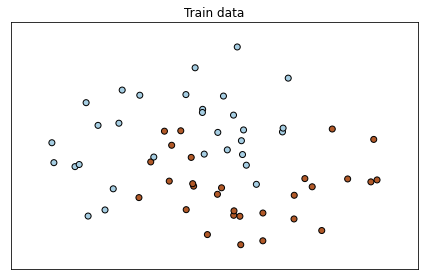

In [4]:
ax = plot_dataset(X_train, X_test, y_train, y_test, plot_test=False)
plt.tight_layout()
plt.show()

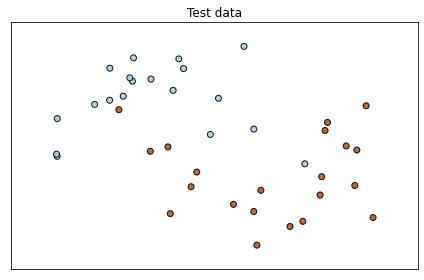

In [5]:
ax = plot_dataset(X_train, X_test, y_train, y_test, plot_train=False)
plt.tight_layout()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

score dla danych treningowych  0.4922626605617718
score dla danych testowych     0.6246193454069804


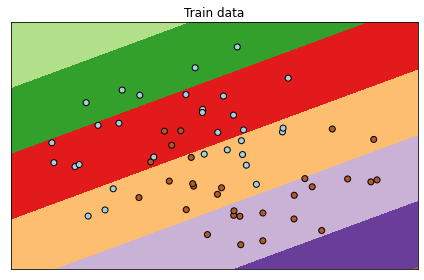

In [7]:
# wykres z granicami decyzyjnymi dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test, clf=clf, plot_test=False)
plt.tight_layout()
plt.show()

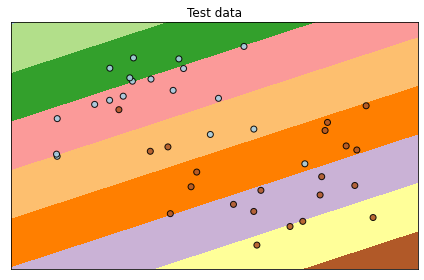

In [8]:
# wykres z granicami decyzyjnymi dla danych testowych

ax = plot_dataset(X_train, X_test, y_train, y_test, clf=clf, plot_train=False)
plt.tight_layout()
plt.show()

In [9]:
# pipeline sklaowanie -> LInearRegression dla danych z pierwszej komórki

# tworzenie zbioru danych
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# biblioteka do make_pipeline
from sklearn.pipeline import Pipeline

X, y = make_moons(noise=0.3, random_state=0)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

# ze skalowanie
clf = Pipeline([('scaler',StandardScaler()), ("clf", LinearRegression())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ZE SKALOWANIEM ", clf.score(X_train, y_train))
print("score dla danych testowych    ZE SKALOWANIEM ", clf.score(X_test, y_test))

score dla danych treningowych ZE SKALOWANIEM  0.4922626605617717
score dla danych testowych    ZE SKALOWANIEM  0.6246193454069804


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# z zastosowaniem transformacji Polynomial_features
clf = Pipeline([("poly", PolynomialFeatures(degree=3)), ("clf", LinearRegression())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych   ", clf.score(X_test, y_test))

score dla danych treningowych  0.6716821772482906
score dla danych testowych    0.7299074490165893


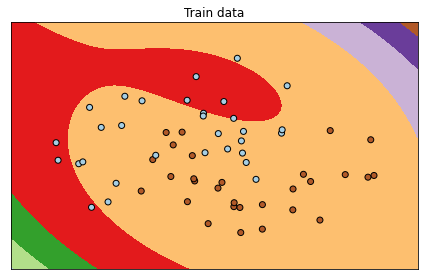

In [21]:
# wykres z granicami decyzyjnymi dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test, clf=clf, plot_test=False)
plt.tight_layout()
plt.show()

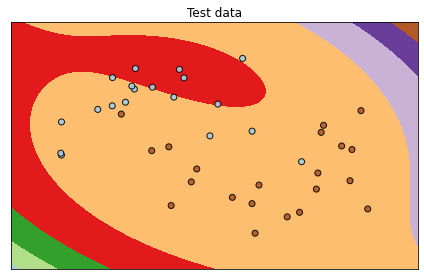

In [22]:
# wykres z granicami decyzyjnymi dla danych testowych

ax = plot_dataset(X_train, X_test, y_train, y_test, clf=clf, plot_train=False)
plt.tight_layout()
plt.show()

In [23]:
# LinearRegression stopein wielomianu

for degree_value in range(1, 10):
  clf = Pipeline([('scaler',StandardScaler()), ("poly", PolynomialFeatures(degree=degree_value)), ("clf", LinearRegression())])
  clf.fit(X_train, y_train)

  print("---------------")
  print("score dla danych treningowych i degree= {} : {} " .format(degree_value, clf.score(X_train, y_train)))
  print("score dla danych testowych i degree= {} : {} " .format(degree_value, clf.score(X_test, y_test)))

---------------
score dla danych treningowych i degree= 1 : 0.4922626605617717 
score dla danych testowych i degree= 1 : 0.6246193454069804 
---------------
score dla danych treningowych i degree= 2 : 0.5107998261827634 
score dla danych testowych i degree= 2 : 0.5594838252269743 
---------------
score dla danych treningowych i degree= 3 : 0.6716821772482904 
score dla danych testowych i degree= 3 : 0.7299074490165893 
---------------
score dla danych treningowych i degree= 4 : 0.684328712726951 
score dla danych testowych i degree= 4 : 0.6781327532729008 
---------------
score dla danych treningowych i degree= 5 : 0.8234463368933939 
score dla danych testowych i degree= 5 : -0.9772628976884454 
---------------
score dla danych treningowych i degree= 6 : 0.7634578638764987 
score dla danych testowych i degree= 6 : -0.4591005593911748 
---------------
score dla danych treningowych i degree= 7 : 0.8558583496567338 
score dla danych testowych i degree= 7 : -15.190306583424112 
-----------

In [43]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet

# Lasso 

# tworzenie zbioru danych
X, y = make_moons(noise=0.3, random_state=0)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

# ze skalowanie
clf = LinearRegression()
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

score dla danych treningowych  0.4922626605617718
score dla danych testowych     0.6246193454069804


In [49]:
from sklearn.datasets import load_wine
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet

# Lasso 

# tworzenie zbioru danych
wine_data = load_wine(return_X_y=False)

X, y = wine_data.data, wine_data.target

# wypisujemy nazwy cech
print(wine_data.feature_names)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [53]:
print("wymiarowośc przed PolynomialFeatures ", X.shape)
print("wymiarowośc po PolynomialFeatures ", PolynomialFeatures(degree=2).fit_transform(X).shape)

wymiarowośc przed PolynomialFeatures  (178, 13)
wymiarowośc po PolynomialFeatures  (178, 105)


In [47]:
# regresja Liniowa 

clf = Pipeline([('scaler',StandardScaler()), ("poly", PolynomialFeatures(degree=3)), ("clf", LinearRegression())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

score dla danych treningowych  1.0
score dla danych testowych     0.7393925752664954


In [48]:
# Lasso

clf = Pipeline([('scaler',StandardScaler()), ("clf", Lasso())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

print("wartości dla poszcególnych cech ", clf["clf"].coef_)

score dla danych treningowych  0.0
score dla danych testowych     -0.0057487466696952705
wartości dla poszcególnych cech  [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0.]


In [39]:
# Ridge

clf = Pipeline([('scaler',StandardScaler()), ("poly", PolynomialFeatures(degree=3)), ("clf", Ridge())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

score dla danych treningowych  0.6689550321881674
score dla danych testowych     0.7275558964369723


In [40]:
# ElasticNet

clf = Pipeline([('scaler',StandardScaler()), ("poly", PolynomialFeatures(degree=3)), ("clf", ElasticNet())])
clf.fit(X_train, y_train)

print("score dla danych treningowych ", clf.score(X_train, y_train))
print("score dla danych testowych    ", clf.score(X_test, y_test))

score dla danych treningowych  0.17286309636512653
score dla danych testowych     0.23950101654507527
